<a href="https://colab.research.google.com/github/aiman1717a/ai_project/blob/master/fruits_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.applications import VGG16
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.optimizers import SGD

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
#Initial code
img_width, img_height = 224, 224
train_data_dir = 'ai_project/fruits_dataset/Training'
validation_data_dir = 'ai_project/fruits_dataset/Valid'
test_data_dir = 'ai_project/fruits_dataset/Test'

In [4]:
vgg16 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 2s 0us/step


In [5]:
for layer in vgg16.layers:
    print(layer.name + " = " + str(layer.trainable))

input_1 = False
block1_conv1 = True
block1_conv2 = True
block1_pool = True
block2_conv1 = True
block2_conv2 = True
block2_pool = True
block3_conv1 = True
block3_conv2 = True
block3_conv3 = True
block3_pool = True
block4_conv1 = True
block4_conv2 = True
block4_conv3 = True
block4_pool = True
block5_conv1 = True
block5_conv2 = True
block5_conv3 = True
block5_pool = True


In [0]:
# Freeze the layers except the last 4 layers
#for layer in vgg16.layers[:-4]:
#    layer.trainable = False

In [7]:
# Create the model
model = Sequential()
 
# Add the vgg convolutional base model
model.add(vgg16)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(101, activation='softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=1, nesterov=True)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 101)               103525    
Total params: 40,509,349
Trainable params: 40,509,349
Non-trainable params: 0
_________________________________________________________________


In [8]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        directory=train_data_dir,
        target_size=(img_width, img_height),
        batch_size=64,
        class_mode='categorical')

Found 52262 images belonging to 101 classes.


In [9]:
validation_datagen = ImageDataGenerator(rescale=1./255)
 
validation_generator = validation_datagen.flow_from_directory(
        directory=validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=64,
        class_mode='categorical',
        shuffle=False)

Found 17540 images belonging to 101 classes.


In [17]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/10
817/816 [==============================] - 856s 1s/step - loss: 4.5980 - acc: 0.0188 - val_loss: 4.5974 - val_acc: 0.0187
Epoch 2/10
817/816 [==============================] - 851s 1s/step - loss: 4.5981 - acc: 0.0189 - val_loss: 4.5974 - val_acc: 0.0187
Epoch 3/10
817/816 [==============================] - 848s 1s/step - loss: 4.5976 - acc: 0.0187 - val_loss: 4.5974 - val_acc: 0.0187
Epoch 4/10
817/816 [==============================] - 851s 1s/step - loss: 4.5978 - acc: 0.0190 - val_loss: 4.5974 - val_acc: 0.0187
Epoch 5/10
817/816 [==============================] - 849s 1s/step - loss: 4.5976 - acc: 0.0186 - val_loss: 4.5975 - val_acc: 0.0187
Epoch 6/10
817/816 [==============================] - 851s 1s/step - loss: 4.5979 - acc: 0.0188 - val_loss: 4.5974 - val_acc: 0.0187
Epoch 7/10
817/816 [==============================] - 848s 1s/step - loss: 4.5974 - acc: 0.0190 - val_loss: 4.5974 - val_acc: 0.0187
Epoch 8/10
817/816 [==============================] - 850s 1s/step - 

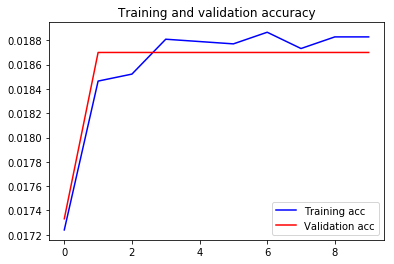

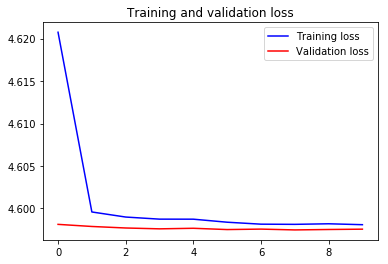

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [12]:
model.evaluate_generator(generator=validation_generator, steps=validation_generator.samples/validation_generator.batch_size)

[4.597553641059379, 0.018700114025085517]

In [13]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(img_width, img_height),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
)

Found 106 images belonging to 1 classes.


In [14]:
pred=model.predict_generator(test_generator,steps=test_generator.n//test_generator.batch_size,verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=test_generator.filenames
print("Nueral Network Output Results")
print("-----------------------------")
for actual, expected in zip(filenames, predictions):
    print("Actual Picture = " + actual, "\nExpected Output = " + expected)
    print("\n")

106/106 [==============================] - 19s 177ms/step
Nueral Network Output Results
-----------------------------
Actual Picture = test_folder/Bananas(lady_finger)1.jpg 
Expected Output = Grape Blue


Actual Picture = test_folder/Bananas(lady_finger)2.jpg 
Expected Output = Grape Blue


Actual Picture = test_folder/Bananas(lady_finger)3.jpg 
Expected Output = Grape Blue


Actual Picture = test_folder/Bananas(lady_finger)4.jpg 
Expected Output = Grape Blue


Actual Picture = test_folder/Bananas(lady_finger)5.jpg 
Expected Output = Grape Blue


Actual Picture = test_folder/apple.jpg 
Expected Output = Grape Blue


Actual Picture = test_folder/apple_apricot_nectarine_peach_peach(flat)_pomegranate_pear_plum.jpg 
Expected Output = Grape Blue


Actual Picture = test_folder/apple_apricot_peach_peach(flat)_pomegranate_pear_plum.jpg 
Expected Output = Plum 3


Actual Picture = test_folder/apple_apricot_peach_peach(flat)_pomegranate_pear_plum_2.jpg 
Expected Output = Grape Blue


Actual Pict

In [0]:
#!git clone -l -s git://github.com/aiman1717a/ai_project.git ai_project

In [0]:
#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())